In [5]:
import math
import matplotlib.pyplot as plt

In [6]:
#this is an example of a logarithmic function for a natural base o e
x = [0.1, 0.5, 0.9, 1.3, 1.7]
y = []

for item in x:
    value = math.log(item)
    y.append(value)
    
print(y)

[-2.3025850929940455, -0.6931471805599453, -0.10536051565782628, 0.26236426446749106, 0.5306282510621704]


In [7]:
#this is a very simple linear function
a = [0.1, 0.5, 0.9, 1.3, 1.7]
b = [0.1, 0.5, 0.9, 1.3, 1.7]

In [8]:
#this is an exponential function
c = [0.1, 0.5, 0.9, 1.3, 1.7]
d = []

for item in c:
    value = 2*item

    d.append(value)

print(d)

[0.2, 1.0, 1.8, 2.6, 3.4]


Text(0, 0.5, 'Y values')

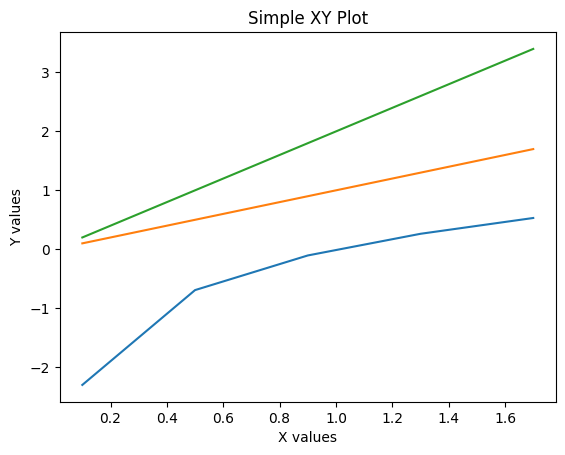

In [9]:
plt.plot(x, y)
plt.plot(a, b)
plt.plot(c, d)

plt.title("Simple XY Plot")
plt.xlabel("X values")
plt.ylabel("Y values")

ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_zlabel('Z-axis Label')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image

In [ ]:
# Load the pre-trained MobileNetV2 model.
# MobileNetV2 is a lightweight model trained on ImageNet dataset for image classification.
# "weights='imagenet'" means we are using the weights learned from training on the ImageNet dataset.
# "include_top=True" means we are including the top layers which make the final classification decisions.
base_model = MobileNetV2(weights='imagenet', include_top=True)

def predict_image(img_path):
    # Load the image from the provided path.
    # "target_size=(224, 224)" resizes the image to the required input size for MobileNetV2.
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Convert the image to a numpy array.
    # This is necessary as the model expects input data as a numerical array.
    x = image.img_to_array(img)
    
    # Expand the shape of the array. 
    # MobileNetV2 expects input in the shape (batch_size, height, width, channels).
    # We are processing one image at a time, so the batch size is 1.
    x = np.expand_dims(x, axis=0)
    
    # Preprocess the image.
    # This step scales the pixel values in the image so they're suitable for the model.
    # Each pre-trained model in Keras comes with its own preprocess_input function.
    x = preprocess_input(x)

    # Make predictions using the pre-trained model.
    # The output is a probability distribution over the 1000 classes from ImageNet.
    preds = base_model.predict(x)

    # Decode the predictions to understandable class names.
    # The function decode_predictions translates the output of the model into human-readable class names.
    # "top=3" means we take the top 3 most probable classes.
    decoded_preds = decode_predictions(preds, top=3)[0]
    
    return decoded_preds

if __name__ == "__main__":
    # Provide the path to your image here.
    img_path = r"C:\Users\b.ludwicki\Desktop\Sprawy HRowe\gotowanie tomczuk.png"
    
    # Predict the contents of the image.
    predictions = predict_image(img_path)
    
    # Print out the predictions.
    # For each prediction, it prints the class name and the confidence score.
    for i, (imagenet_id, label, score) in enumerate(predictions):
        print(f"{i + 1}: {label} ({score:.2f})")